In [3]:
# Import the dependencies.
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import config

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
#for x,y in lat_lngs:
#    print(x,y)

In [6]:
print(lat_lngs)

In [7]:
coords = list(lat_lngs)

In [8]:
print(coords)

[(-41.17254956065804, -129.8643968002449), (71.12180529741457, -16.643018450703124), (-9.897935734252854, -40.034125895182996), (46.9323388249546, -114.54925895555527), (-20.695122972559304, -176.93094490333468), (49.99065686346239, 28.351906970515245), (10.718782692473951, 157.21790617013926), (40.502316508005265, 44.00156992694761), (-8.561256866740209, -109.86795299109849), (-45.59567800001669, 177.43359420389908), (0.8699621077395534, -86.00085286903241), (-20.364925474188183, -166.67492595227228), (56.505269075078274, -148.69156822705185), (88.495752295718, 64.14474663313695), (-39.2911833342132, -170.33755158905905), (76.36309577610965, -43.30567939757492), (12.2251918024768, 152.66793964292117), (-64.5146228291711, -112.45947852222953), (8.86529381121828, -73.05946074020288), (17.903497326022745, -36.605203863500805), (72.55165387133914, -175.9540951928952), (5.290091253628731, 23.094373480095385), (-16.74645651561532, -90.71222018251422), (41.28280856684313, -69.9123255481957),

In [9]:
from citipy import citipy

In [10]:
cities = list(set([citipy.nearest_city(x,y).city_name for x,y in coords]))
#cities

In [11]:
def timeAlt(coordinates):
    cities = []
# Identify the nearest city for each latitude and longitude combination.
    for coordinate in coords:
        city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

        # If the city is unique, then we will add it to the cities list.
        if city not in cities:
            cities.append(city)
    # Print the city count to confirm sufficient count.
    len(cities)
    
timeAlt(coords)

In [12]:
print(coords[:10])

[(-41.17254956065804, -129.8643968002449), (71.12180529741457, -16.643018450703124), (-9.897935734252854, -40.034125895182996), (46.9323388249546, -114.54925895555527), (-20.695122972559304, -176.93094490333468), (49.99065686346239, 28.351906970515245), (10.718782692473951, 157.21790617013926), (40.502316508005265, 44.00156992694761), (-8.561256866740209, -109.86795299109849), (-45.59567800001669, 177.43359420389908)]


In [13]:
print(len(coords))

100


In [14]:
len(cities)

78

In [15]:
len(set(cities))

78

In [16]:
import requests

In [17]:

import requests
from config import weather_api_key

#initialize dictionary of dictionaries to hold weather data
url = f"http://api.openweathermap.org/data/2.5/weather"

city_weathers = dict([(key, {
    "url": f"{url}?units=Imperial&APPID={weather_api_key}&q={key}",
    "weather_data": {}
}) for key in cities])

print(city_weathers[cities[0]])

{'url': 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e6a2aea27469945d17fdeecb4c8430c8&q=kodiak', 'weather_data': {}}


In [18]:
import json

#get all weather
for key in city_weathers:
    
    print(key)
    city_weather = requests.get(city_weathers[key]["url"])

    if city_weather.status_code == 200:
        weather_data = json.loads(city_weather.text)

        weather = json.loads(city_weather.text)
        
        city_weathers[key]["weather_data"] = weather

kodiak
carnarvon
ziarat
el tarra
ponta do sol
bangassou
toamasina
orchard homes
lebu
nome
hunza
kapaa
alice springs
prescott valley
cape town
chudniv
olafsvik
torbay
jamestown
nantucket
butaritari
luderitz
lernakert
sumbe
bolungarvik
albany
puerto ayora
vaini
waipawa
tuktoyaktuk
chokurdakh
mys shmidta
saint-philippe
lompoc
kavieng
grindavik
ilulissat
qaanaaq
kaitangata
kushima
talnakh
amazar
punta arenas
amderma
avera
lushunkou
shimoda
tasiilaq
mahebourg
rikitea
hilo
collipulli
alofi
mataura
yuanping
san cristobal
gulshat
husavik
barrow
hermanus
ushuaia
taolanaro
bilma
huarmey
izhmorskiy
khatanga
santa rosa
hobart
busselton
atuona
jaguarari
attawapiskat
grand river south east
bluff
carballo
thompson
tucumcari
katobu


In [23]:
print(json.dumps(city_weathers, indent=2))

{
  "kodiak": {
    "url": "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e6a2aea27469945d17fdeecb4c8430c8&q=kodiak",
    "weather_data": {
      "coord": {
        "lon": -152.41,
        "lat": 57.79
      },
      "weather": [
        {
          "id": 800,
          "main": "Clear",
          "description": "clear sky",
          "icon": "01d"
        }
      ],
      "base": "stations",
      "main": {
        "temp": 30.2,
        "feels_like": 22.03,
        "temp_min": 30.2,
        "temp_max": 30.2,
        "pressure": 1000,
        "humidity": 74
      },
      "visibility": 16093,
      "wind": {
        "speed": 6.15,
        "deg": 308
      },
      "clouds": {
        "all": 1
      },
      "dt": 1582063507,
      "sys": {
        "type": 1,
        "id": 7668,
        "country": "US",
        "sunrise": 1582047216,
        "sunset": 1582082033
      },
      "timezone": -32400,
      "id": 5866583,
      "name": "Kodiak",
      "cod": 200
    }
  

In [24]:
from datetime import datetime

# city_data = []

# try:
#     city_data = [{
#                  "City":       city,
#                  "Lat":        data["weather_data"]["coord"]["lat"],
#                  "Lng":        data["weather_data"]["coord"]["lon"],
#                  "Max Temp":   data["weather_data"]["main"]["temp_max"],
#                  "Humidity":   data["weather_data"]["main"]["humidity"],
#                  "Cloudiness": data["weather_data"]["clouds"]["all"],
#                  "Wind Speed": data["weather_data"]["wind"]["speed"],
#                  "Country":    data["weather_data"]["sys"]["country"],
#                  "Date":       datetime.utcfromtimestamp(data["weather_data"]["dt"])
#                 } for city,data in city_weathers.items()]
# except:
#     continue
# print(city_data[0])

In [25]:
city_data = []
for city, data in city_weathers.items():
    
    try:
        lat = data["weather_data"]["coord"]["lat"]
        print(lat)
        lng = data["weather_data"]["coord"]["lon"]
        max_temp = data["weather_data"]["main"]["temp_max"]
        humidity = data["weather_data"]["main"]["humidity"]
        clouds = data["weather_data"]["clouds"]["all"]
        wind = data["weather_data"]["wind"]["speed"]
        country = data["weather_data"]["sys"]["country"][0][0],
        country = country[0]
        print(type(country))
        date = data["weather_data"]["dt"]
        date = datetime.utcfromtimestamp(date)
        print(date)
        city_data.append({
            "City": city,
            "Lat":lat,
            "Lng":lng,
            "Max Temp":max_temp,
            "Humidity":humidity,
            "Cloudiness":clouds,
            "Wind Speed":wind,
            "Country":country,
            "Date":date
        })
        
    except:
        print("csdcsdcs")

57.79
<class 'str'>
2020-02-18 22:05:07
-24.87
<class 'str'>
2020-02-18 22:05:08
30.38
<class 'str'>
2020-02-18 22:02:13
8.58
<class 'str'>
2020-02-18 22:05:08
32.67
<class 'str'>
2020-02-18 22:05:08
4.74
<class 'str'>
2020-02-18 22:05:08
-18.17
<class 'str'>
2020-02-18 22:05:09
46.86
<class 'str'>
2020-02-18 22:05:09
-37.62
<class 'str'>
2020-02-18 22:05:09
64.5
<class 'str'>
2020-02-18 22:03:01
csdcsdcs
22.08
<class 'str'>
2020-02-18 22:03:02
-23.7
<class 'str'>
2020-02-18 22:00:11
34.59
<class 'str'>
2020-02-18 22:01:12
-33.93
<class 'str'>
2020-02-18 22:03:52
50.05
<class 'str'>
2020-02-18 22:05:11
64.89
<class 'str'>
2020-02-18 22:02:54
47.67
<class 'str'>
2020-02-18 22:05:11
42.1
<class 'str'>
2020-02-18 22:00:38
41.28
<class 'str'>
2020-02-18 22:01:49
3.07
<class 'str'>
2020-02-18 22:05:12
-26.65
<class 'str'>
2020-02-18 22:05:12
40.56
<class 'str'>
2020-02-18 22:05:13
-11.21
<class 'str'>
2020-02-18 22:05:13
csdcsdcs
42.6
<class 'str'>
2020-02-18 22:03:03
-0.74
<class 'str'>
20

In [26]:
city_data


[{'City': 'kodiak',
  'Lat': 57.79,
  'Lng': -152.41,
  'Max Temp': 30.2,
  'Humidity': 74,
  'Cloudiness': 1,
  'Wind Speed': 6.15,
  'Country': 'U',
  'Date': datetime.datetime(2020, 2, 18, 22, 5, 7)},
 {'City': 'carnarvon',
  'Lat': -24.87,
  'Lng': 113.63,
  'Max Temp': 75.2,
  'Humidity': 94,
  'Cloudiness': 0,
  'Wind Speed': 5.82,
  'Country': 'A',
  'Date': datetime.datetime(2020, 2, 18, 22, 5, 8)},
 {'City': 'ziarat',
  'Lat': 30.38,
  'Lng': 67.73,
  'Max Temp': 37.47,
  'Humidity': 49,
  'Cloudiness': 10,
  'Wind Speed': 6.8,
  'Country': 'P',
  'Date': datetime.datetime(2020, 2, 18, 22, 2, 13)},
 {'City': 'el tarra',
  'Lat': 8.58,
  'Lng': -73.09,
  'Max Temp': 86.94,
  'Humidity': 44,
  'Cloudiness': 80,
  'Wind Speed': 3.87,
  'Country': 'C',
  'Date': datetime.datetime(2020, 2, 18, 22, 5, 8)},
 {'City': 'ponta do sol',
  'Lat': 32.67,
  'Lng': -17.1,
  'Max Temp': 60.8,
  'Humidity': 63,
  'Cloudiness': 75,
  'Wind Speed': 19.46,
  'Country': 'P',
  'Date': datetime.dat

In [27]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.79,-152.41,30.20,74,1,6.15,U,2020-02-18 22:05:07
1,carnarvon,-24.87,113.63,75.20,94,0,5.82,A,2020-02-18 22:05:08
2,ziarat,30.38,67.73,37.47,49,10,6.80,P,2020-02-18 22:02:13
3,el tarra,8.58,-73.09,86.94,44,80,3.87,C,2020-02-18 22:05:08
4,ponta do sol,32.67,-17.10,60.80,63,75,19.46,P,2020-02-18 22:05:08
...,...,...,...,...,...,...,...,...,...
64,bluff,-46.60,168.33,59.00,83,85,11.99,N,2020-02-18 22:05:24
65,carballo,43.21,-8.69,45.00,87,20,5.82,E,2020-02-18 22:05:24
66,thompson,55.74,-97.86,-9.40,57,20,13.87,C,2020-02-18 22:03:03
67,tucumcari,35.17,-103.72,44.60,52,90,5.82,U,2020-02-18 22:05:25


In [28]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [29]:
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

<IPython.core.display.Javascript object>


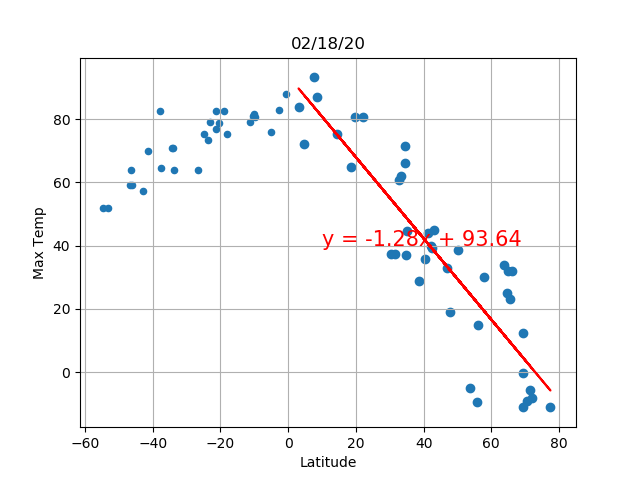

In [30]:
import time

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

ax = city_data_df.plot(x="Lat", y="Max Temp", kind="scatter")



today = time.time()
today = time.strftime("%x")

ax.set_title(today)
ax.set_ylabel("Max Temperature (F)")

plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

In [31]:
import time

today = time.time()
today = time.strftime("%x")


##ax.get_figure()
#plt

<IPython.core.display.Javascript object>


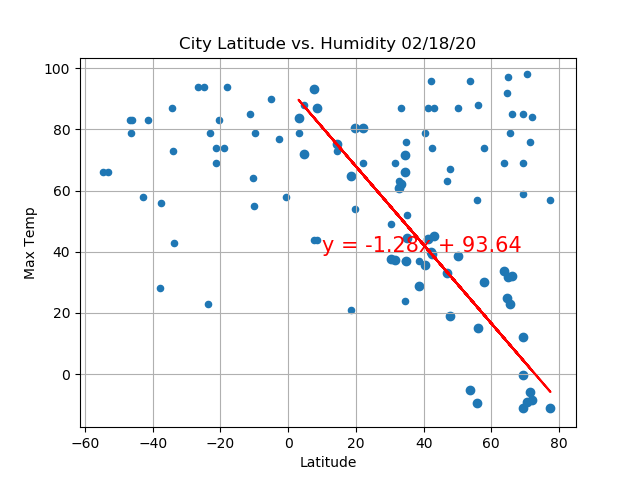

In [32]:
ax2 = city_data_df.plot(x="Lat", y="Humidity", kind="scatter")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

<IPython.core.display.Javascript object>


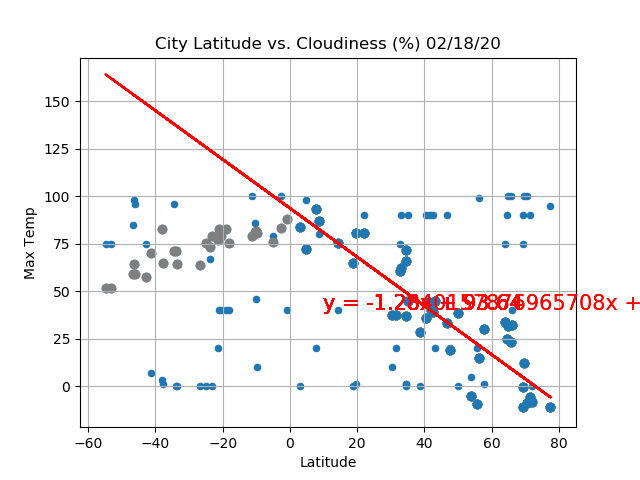

In [33]:
ax3 = city_data_df.plot(x="Lat", y="Cloudiness", kind="scatter")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

<IPython.core.display.Javascript object>


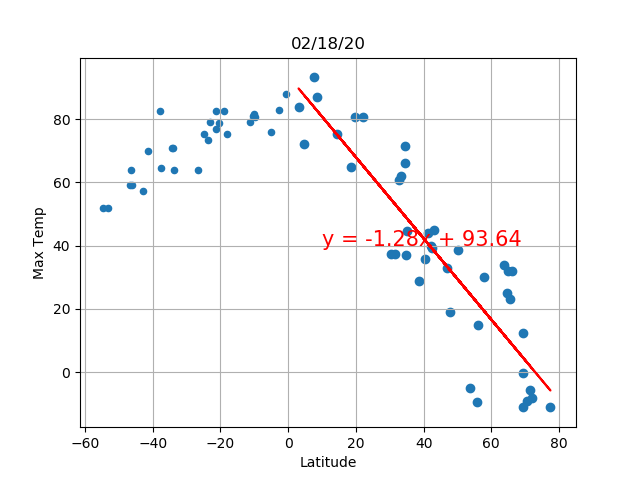

In [34]:

from scipy.stats import linregress



ax.get_figure()

<IPython.core.display.Javascript object>


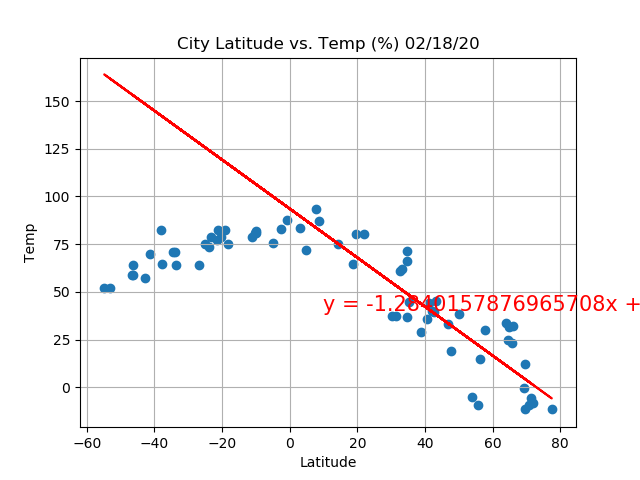

-1.2840157876965708
y = -1.2840157876965708x + 93.63961085108318


In [52]:
northern_hem = city_data_df.loc[city_data_df["Lat"] > 0]

ax3 = city_data_df.loc[city_data_df["Lat"] > 0].plot(x="Lat", y="Max Temp", kind="scatter")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Temp (%) "+ time.strftime("%x"))
plt.ylabel("Temp")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

(slope, intercept, r_value, p_value, std_err) = linregress(city_data_df.loc[city_data_df["Lat"] > 0]["Lat"], city_data_df.loc[city_data_df["Lat"] > 0]["Max Temp"])
print(slope)

line = f"y = {slope}x + {intercept}"
print(line)

In [53]:
regress_vals = [(slope*x + intercept) for x in city_data_df["Lat"]]

north_xvals = northern_hem["Lat"]
north_yvals = northern_hem["Max Temp"]
regress_vals

[19.436338480098357,
 125.5730834910969,
 54.63121122086136,
 82.6227553926466,
 51.690815067036205,
 87.55337601740143,
 116.97017771352986,
 33.47063103962187,
 141.94428478422816,
 10.82059254465436,
 65.2885422587429,
 124.07078501949191,
 49.225504754658786,
 137.20626652762783,
 29.37462067686981,
 10.319826387452693,
 32.43057825158765,
 39.582546189057545,
 40.635439134968735,
 89.69768238285471,
 127.85863159319678,
 41.55993050211026,
 108.03342783116173,
 38.94053829520926,
 94.58978253397864,
 120.86074555025047,
 146.81070461959817,
 4.464714395556328,
 2.949575766074389,
 121.06618807628193,
 49.161303965273966,
 96.93953142546336,
 11.668042964534095,
 4.760038026726548,
 -5.845932379647138,
 153.06386150568048,
 53.24447417014906,
 4.41335376404848,
 24.48252052574587,
 161.8850499671559,
 51.023126857433994,
 49.12278349164307,
 9.395335020311165,
 119.84637307797018,
 123.3260558626279,
 68.30597935982983,
 142.36800999416803,
 118.11295176457982,
 152.94830008478777,

In [67]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_vals,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

<IPython.core.display.Javascript object>


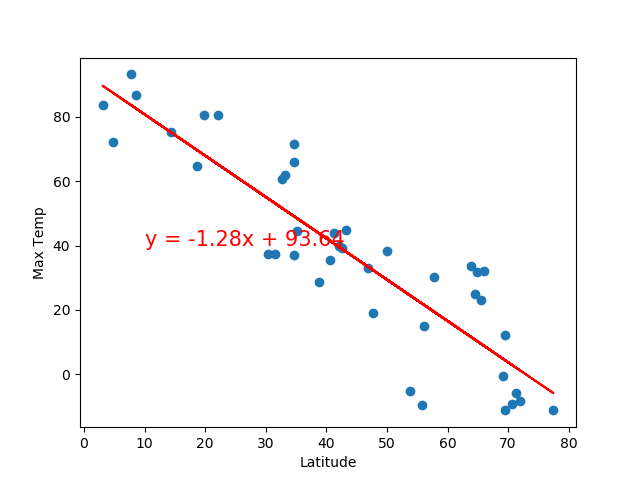

In [86]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    #fig2, ax2 = plt.subplot()
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.title=title
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    #return ax2
    
#ax3.get_figure()
plt.cla()
plt.close()
plot_linear_regression(north_xvals, north_yvals,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

<IPython.core.display.Javascript object>


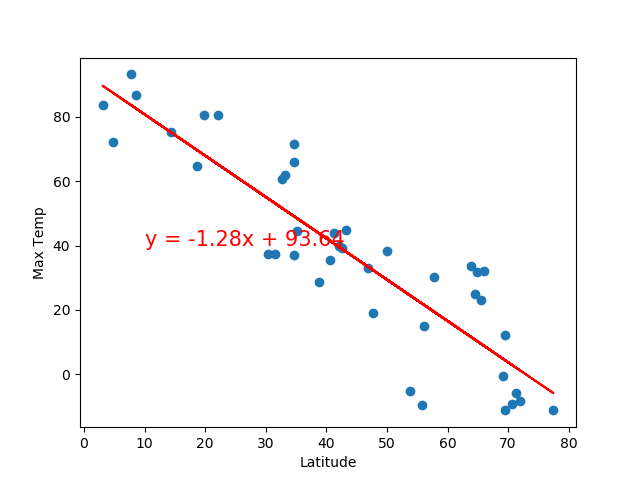

In [87]:
plt.gca().get_figure()